In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,Embedding
from tensorflow import keras


df=pd.read_csv('/content/drive/MyDrive/dataset/etkiketli.csv')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10619 entries, 0 to 10618
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10619 non-null  int64  
 1   yorum         10619 non-null  object 
 2   Subjectivity  10619 non-null  float64
 3   Polarity      10619 non-null  float64
 4   Analysis      10619 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 414.9+ KB


In [2]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,yorum,Subjectivity,Polarity,Analysis
0,I bought my daughter iPhone Plus GB made the p...,0.000000,0.000000,Neutral
1,"I bought it as a gift to my wife, the reason f...",0.750000,0.800000,Positive
2,I bought it from the seller in Hepsiburada.,0.000000,0.000000,Neutral
3,fast shipping super phone,0.633333,0.266667,Positive
4,I bought the lira here at a low price thanks,0.250000,0.100000,Positive


In [3]:
def getAnalysis(score):
  if score < 0:
    return 0
  elif score==0:
    return 1
  else:
    return 2
df['Label'] = df['Polarity' ].apply(getAnalysis)
df

,yorum,Subjectivity,Polarity,Analysis,Label
0,I bought my daughter iPhone Plus GB made the p...,0.000000,0.000000,Neutral,1
1,"I bought it as a gift to my wife, the reason f...",0.750000,0.800000,Positive,2
2,I bought it from the seller in Hepsiburada.,0.000000,0.000000,Neutral,1
3,fast shipping super phone,0.633333,0.266667,Positive,2
4,I bought the lira here at a low price thanks,0.250000,0.100000,Positive,2
...,...,...,...,...,...
10614,The colors of the iPhone are beautiful especia...,1.000000,0.616667,Positive,2
10615,wonderful phone appe expensive job is doing qu...,0.850000,0.250000,Positive,2
10616,"First of all, thank you fast shipping, the car...",0.511111,0.383333,Positive,2
10617,very nice seller related speed shipping,0.700000,0.390000,Positive,2


In [4]:
#label=df['label'].values
label=df['Label'].values

yorum=df['yorum']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
features=vectorizer.fit_transform(yorum)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train, y_test=train_test_split(features.toarray(),label,test_size=0.2,random_state=42)

In [6]:
print(features.shape, X_train.shape, y_train.shape)

(10619, 5290) (8495, 5290) (8495,)


In [7]:
trainX = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
trainY= np.reshape(y_train, (y_train.shape[0],1))
testY= np.reshape(y_test, (y_test.shape[0],1))


In [8]:
model = Sequential()

model.add(SimpleRNN(32,input_shape = (1,features.shape[1]), activation='relu',return_sequences=False))


model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

#model.compile(loss="mean_absolute_error", optimizer='adam', metrics=["accuracy"])
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                170336    
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [9]:
history=model.fit(trainX, trainY,validation_split=0.2 ,epochs=10,batch_size=500)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - 5s 67ms/step - loss: 1.0404 - accuracy: 0.7072 - val_loss: 0.9378 - val_accuracy: 0.7122
Epoch 2/10
14/14 [==============================] - 0s 24ms/step - loss: 0.8290 - accuracy: 0.7248 - val_loss: 0.8086 - val_accuracy: 0.7122
Epoch 3/10
14/14 [==============================] - 0s 22ms/step - loss: 0.7537 - accuracy: 0.7248 - val_loss: 0.7628 - val_accuracy: 0.7122
Epoch 4/10
14/14 [==============================] - 0s 22ms/step - loss: 0.7081 - accuracy: 0.7248 - val_loss: 0.6957 - val_accuracy: 0.7122
Epoch 5/10
14/14 [==============================] - 0s 23ms/step - loss: 0.5673 - accuracy: 0.7248 - val_loss: 0.5697 - val_accuracy: 0.7122
Epoch 6/10
14/14 [==============================] - 0s 26ms/step - loss: 0.4130 - accuracy: 0.7362 - val_loss: 0.5422 - val_accuracy: 0.8234
Epoch 7/10
14/14 [==============================] - 0s 20ms/step - loss: 0.3423 - accuracy: 0.8876 - val_loss: 0.5404 - val_accuracy: 0.8328
Epoch 8/10
14/14 [======

In [10]:
trainscore= model.evaluate(testX,testY,verbose=0)
print(trainscore)

[0.549900472164154, 0.8441619873046875]


In [11]:
from sklearn.metrics import classification_report

y_pred = model.predict(testX, batch_size=200,verbose=0)
    
y_pred_bool = np.argmax(y_pred,axis=1)
class_names = ["Negatif","Neutar","Positive"]

print(classification_report(testY, y_pred_bool,target_names=class_names ))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00       203
      Neutar       0.62      0.86      0.72       402
    Positive       0.92      0.95      0.94      1519

    accuracy                           0.84      2124
   macro avg       0.51      0.61      0.55      2124
weighted avg       0.78      0.84      0.81      2124



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


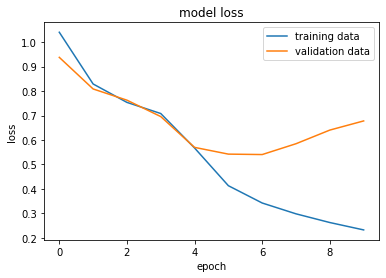

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

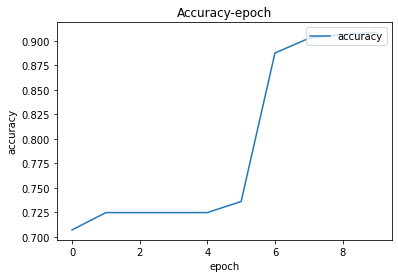

In [13]:
plt.plot(history.history['accuracy'])

plt.title('Accuracy-epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['accuracy'], loc = 'upper right')